# Solving travelling salesman problem by quantum computer
### group 5 : 盧弘偉、黃政勛、顏柏傑

In [1]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi
import math
import cmath

## First, let's try to build a unitary gate Ui whose matrix form looks like:
<img src="./1.png" width="20%" align="left">

In [2]:
# mention : the control bit is q_2
def Ui(qc,qubit,n,lis):
    matrix=[[0 for i in range(2*n)] for j in range(2*n)]
    for i  in range(2*n):
        if i<n:
            matrix[i][i]=1
        else:
            matrix[i][i]=cmath.exp(lis[i-n]*1j)
    qc.unitary(matrix,qubit)

qc_test=QuantumCircuit(3)
x=math.pi
Ui(qc_test,[0,1,2],4,[x/2,x/4,x/1,0])
qc_test.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1 Unitary ├
     │          │
q_2: ┤2         ├
     └──────────┘

In [3]:
# check if the matrix looks like what we want
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qc_test, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [4]:
# expand it
from qiskit import transpile
trans_qc = transpile(qc_test, basis_gates = ["cx", "rz", "ry"])
trans_qc.draw()

global phase: 0.68722
     ┌─────────────┐┌───┐┌───────────┐┌───┐┌────────────┐┌───┐┌───────────┐»
q_0: ┤ Rz(0.68722) ├┤ X ├┤ Rz(3π/16) ├┤ X ├┤ Rz(-3π/16) ├┤ X ├┤ Rz(5π/16) ├»
     └─────────────┘└─┬─┘└───────────┘└─┬─┘└────────────┘└─┬─┘├───────────┤»
q_1: ─────────────────■─────────────────┼──────────────────■──┤ Rz(7π/16) ├»
                                        │                     └───────────┘»
q_2: ───────────────────────────────────■──────────────────────────────────»
                                                                           »
«     ┌───┐┌──────────┐ ┌─────────┐          ┌───┐    ┌─────────┐┌─────────┐»
«q_0: ┤ X ├┤ Rz(-π/2) ├─┤ Ry(π/2) ├──────────┤ X ├────┤ Rz(π/2) ├┤ Ry(π/2) ├»
«     └─┬─┘└──┬───┬───┘┌┴─────────┴┐┌───┐    └─┬─┘    └─────────┘└─────────┘»
«q_1: ──┼─────┤ X ├────┤ Rz(7π/16) ├┤ X ├──────■────────────────────────────»
«       │     └─┬─┘    └───────────┘└─┬─┘┌───────────┐                      »
«q_2: ──■───────■─────────────────────■──┤ Rz(-π/16) ├──────────────────────»
«                                        └───────────┘                      »
«     ┌──────────┐┌───┐┌─────────┐┌─────────┐┌──────────┐┌───┐┌─────────┐ »
«q_0: ┤ Rz(-π/2) ├┤ X ├┤ Rz(π/2) ├┤ Ry(π/2) ├┤ Rz(-π/2) ├┤ X ├┤ Rz(π/2) ├─»
«     └──────────┘└─┬─┘└─────────┘└─────────┘└──────────┘└─┬─┘├─────────┴┐»
«q_1: ──────────────┼──────────────────────────────────────■──┤ Rz(-π/2) ├»
«                   │                                         └──────────┘»
«q_2: ──────────────■─────────────────────────────────────────────────────»
«                                                                         »
«     ┌─────────────┐┌──────────┐                         ┌───┐┌──────────┐»
«q_0: ┤ Ry(0.68722) ├┤ Rz(-π/2) ├─────────────────────────┤ X ├┤ Rz(-π/2) ├»
«     └─┬─────────┬─┘└──┬───┬───┘┌──────────┐┌───────────┐└─┬─┘└──────────┘»
«q_1: ──┤ Ry(π/2) ├─────┤ X ├────┤ Ry(-π/2) ├┤ Rz(-3π/8) ├──■──────────────»
«       └─────────┘     └─┬─┘    └──────────┘└───────────┘                 »
«q_2: ────────────────────■────────────────────────────────────────────────»
«                                                                          »
«     ┌─────────┐┌─────────┐┌───┐┌─────────┐┌─────────┐┌──────────┐┌───┐»
«q_0: ┤ Ry(π/2) ├┤ Rz(π/2) ├┤ X ├┤ Rz(π/2) ├┤ Ry(π/2) ├┤ Rz(-π/2) ├┤ X ├»
«     └─────────┘└─────────┘└─┬─┘└─────────┘└─────────┘└──────────┘└─┬─┘»
«q_1: ────────────────────────┼──────────────────────────────────────■──»
«                             │                                         »
«q_2: ────────────────────────■─────────────────────────────────────────»
«                                                                       »
«     ┌──────────┐┌──────────┐
«q_0: ┤ Ry(-π/2) ├┤ Rz(3π/4) ├
«     └──────────┘└──────────┘
«q_1: ────────────────────────
«                             
«q_2: ────────────────────────
«

## Then we combine n'th Ui gates to form a U gate

In [5]:
qc_test2=QuantumCircuit(9)
phases = [[0, pi / 2, pi / 8, pi / 4],
          [pi / 2, 0, pi / 4, pi / 4],
          [pi / 8, pi / 4, 0, pi / 8],
          [pi / 4, pi / 4, pi / 8, 0]]
m2 = []
for i in range(8):
    m2.append([i*8+j+1 for j in range(8)])
#print(m2)
def U(qc, n, k , c , phase_matrix):
    # c means number of counting bits
    # k means which counting bit is chosen
    num = int(math.log(n,2))
    #print(num)
    for i in range(n):
        eigen_value = [phase_matrix[j][i] for j in range(n)]
        #print(eigen_value)
        uni_matrix=[[0 for i in range(2*n)] for j in range(2*n)]
        for j  in range(2*n):
            if j<n:
                uni_matrix[j][j]=1
            else:
                uni_matrix[j][j]=cmath.exp(eigen_value[j-n]*1j)
        qbs = [k]+[c+i*num+j for j in range(num)]
        qbs.reverse()
        qc.unitary(uni_matrix,qbs)
        #Ui(qc, [k]+[c+i*num+j for j in range(num)], n, eigen_value)

U(qc_test2, 4, 0, 1, phases)
qc_test2.draw()

┌──────────┐┌──────────┐┌──────────┐┌──────────┐
q_0: ┤2         ├┤2         ├┤2         ├┤2         ├
     │          ││          ││          ││          │
q_1: ┤1 Unitary ├┤          ├┤          ├┤          ├
     │          ││          ││          ││          │
q_2: ┤0         ├┤  Unitary ├┤          ├┤          ├
     └──────────┘│          ││          ││          │
q_3: ────────────┤1         ├┤  Unitary ├┤          ├
                 │          ││          ││          │
q_4: ────────────┤0         ├┤          ├┤  Unitary ├
                 └──────────┘│          ││          │
q_5: ────────────────────────┤1         ├┤          ├
                             │          ││          │
q_6: ────────────────────────┤0         ├┤          ├
                             └──────────┘│          │
q_7: ────────────────────────────────────┤1         ├
                                         │          │
q_8: ────────────────────────────────────┤0         ├
                                         └──────────┘

## The size of matrix becomes very large 

In [6]:
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qc_test2, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

## Now we have built the control unitary gates for phase estimation
## Let's move on to build the eigen states

In [7]:
from itertools import permutations
# Function to list all possible cycle paths
def pathsGenerate(n):
    l = []
    for i in range(2,n+1):
        l.append(i)
    paths = list(permutations(l,n-1))
    for i in range(len(paths)):
        paths[i] = tuple([1]) + paths[i]
    eigen_states = []
    state_length = int(math.log2(n))
    format_string = "{0:0" + str(state_length)+"b}"
    for i in range(len(paths)):
        temp_state = ["" for i in range(n)]
        for j in range(n):
            #print(paths[i][j], paths[i][j-1])
            temp_state[paths[i][j]-1] = format_string.format(paths[i][j-1]-1)
        #print(temp_state)
        #print(paths[i], end = " ")
        #print("".join(temp_state))
        eigen_states.append("".join(temp_state))
            
    return paths, eigen_states

paths, eigen_states = pathsGenerate(4)

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen, eigen_values, index):
    #print(eigen_values[index])
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

In [8]:
pathsGenerate(4)

([(1, 2, 3, 4),
  (1, 2, 4, 3),
  (1, 3, 2, 4),
  (1, 3, 4, 2),
  (1, 4, 2, 3),
  (1, 4, 3, 2)],
 ['11000110', '10001101', '11100001', '01110010', '10110100', '01101100'])

## Then we can calculate the distance of one certain path by phase estimation
<img src="./circuit.png" width="60%" align="left">

In [9]:
phases = [[0, pi / 2, pi / 8, pi / 4],
          [pi / 2, 0, pi / 4, pi / 4],
          [pi / 8, pi / 4, 0, pi / 8],
          [pi / 4, pi / 4, pi / 8, 0]]

def TravelingSalesman(n, counting, phases, eigenIndex):
    # Initialization
    unit = QuantumRegister(counting, 'unit')
    # length of eigen vector = n*log2(n)
    eigen = QuantumRegister(n*math.log2(n), 'eigen')
    unit_classical = ClassicalRegister(counting, 'unit_classical')
    qc = QuantumCircuit(unit, eigen, unit_classical)
    # Setting eigenstate
    eigenstates(qc, eigen, eigen_states, eigenIndex)
    # Hadamard on the 'unit' qubits
    qc.h(unit[:])
    qc.barrier()
    # Controlled Unitary
    for i in range(counting):
        #print(2**(5-i))
        for _ in range(2**(5-i)):
            U(qc, n, i, counting, phases)
    # Inverse QFT 
    qc.barrier()
    qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
    qc.append(qft, qc.qubits[:len(unit)])
    qc.barrier()
    # Measure
    qc.measure(unit, unit_classical)
    return qc

qc = TravelingSalesman(4,6,phases,0)
# Draw
qc.draw()

░ ┌───┐ ░ ┌──────────┐┌──────────┐┌──────────┐»
          unit_0: ──────░─┤ H ├─░─┤2         ├┤2         ├┤2         ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_1: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_2: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_3: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │  Unitary ││          ││          │»
          unit_4: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││  Unitary ││          │»
          unit_5: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                  ┌───┐ ░ └───┘ ░ │          ││          ││  Unitary │»
         eigen_0: ┤ X ├─░───────░─┤1         ├┤          ├┤          ├»
                  ├───┤ ░       ░ │          ││          ││          │»
         eigen_1: ┤ X ├─░───────░─┤0         ├┤          ├┤          ├»
                  └───┘ ░       ░ └──────────┘│          ││          │»
         eigen_2: ──────░───────░─────────────┤1         ├┤          ├»
                        ░       ░             │          ││          │»
         eigen_3: ──────░───────░─────────────┤0         ├┤          ├»
                        ░       ░             └──────────┘│          │»
         eigen_4: ──────░───────░─────────────────────────┤1         ├»
                  ┌───┐ ░       ░                         │          │»
         eigen_5: ┤ X ├─░───────░─────────────────────────┤0         ├»
                  ├───┤ ░       ░                         └──────────┘»
         eigen_6: ┤ X ├─░───────░─────────────────────────────────────»
                  └───┘ ░       ░                                     »
         eigen_7: ──────░───────░─────────────────────────────────────»
                        ░       ░                                     »
unit_classical: 6/════════════════════════════════════════════════════»
                                                                      »
«                  ┌──────────┐┌──────────┐┌──────────┐┌──────────┐┌──────────┐»
«          unit_0: ┤2         ├┤2         ├┤2         ├┤2         ├┤2         ├»
«                  │          ││          ││          ││          ││          │»
«          unit_1: ┤          ├┤          ├┤          ├┤          ├┤          ├»
«                  │          ││          ││          ││          ││          │»
«          unit_2: ┤          ├┤          ├┤          ├┤          ├┤          ├»
«                  │          ││          ││          ││          ││          │»
«          unit_3: ┤          ├┤          ├┤          ├┤          ├┤          ├»
«                  │          ││  Unitary ││          ││          ││          │»
«          unit_4: ┤          ├┤          ├┤          ├┤          ├┤          ├»
«                  │          ││          ││  Unitary ││          ││          │»
«          unit_5: ┤          ├┤          ├┤          ├┤          ├┤          ├»
«                  │          ││          ││          ││  Unitary ││          │»
«         eigen_0: ┤          ├┤1         ├┤          ├┤          ├┤          ├»
«                  │  Unitary ││          ││          ││          ││  Unitary │»
«         eigen_1: ┤          ├┤0         ├┤          ├┤          ├┤          ├»
«                  │          │└──────────┘│          ││          ││          │»
«         eigen_2: ┤          ├────────────┤1         ├┤          ├┤          ├»
«                  │          │            │          ││          ││          │»
«         eigen_3: ┤          ├────────────┤0         ├┤          ├┤          ├»
«                  │          │            └──────────┘│          ││          │»
«         eigen_4: ┤          ├────────────────────────┤1         ├┤          ├»
«         

{'100100': 1024}
100100


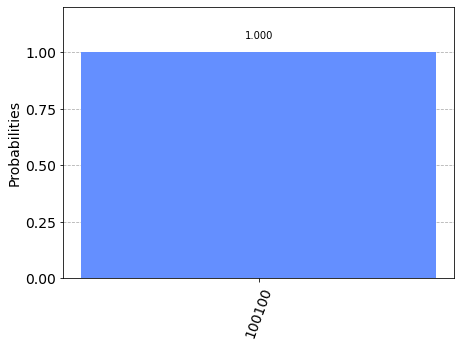

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
count = job.result().get_counts()
print(count)
print(count.most_frequent())
plot_histogram(count)

## Full procedure : build eigen states -> run phase estimation -> find minimum

In [11]:
# 節點數量需為2的次方
n = 4
paths, eigen_states = pathsGenerate(n)
phases = [[   0, pi/2, pi/8, pi/4],
          [pi/2,    0, pi/4, pi/4],
          [pi/8, pi/4,    0, pi/8],
          [pi/4, pi/4, pi/8,    0]]
print ("{:<15} {:<15} {:<15} {:<20} {:<20}".format("path", "eigen state", "output phase", "distance", "check"))

for i in range(len(eigen_states)):
    qc = TravelingSalesman(n,6,phases,i)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    count = job.result().get_counts()
    phase_d = int(count.most_frequent(),2)
    distance = phase_d/2**6
    #驗證路徑長
    d = 0
    for j in range(n):
        start = paths[i][j-1]
        end = paths[i][j]
        d += phases[start-1][end-1]
    print ("{:<15} {:<15} {:<15} {:<20} {:<20}".format(
        str(paths[i]), eigen_states[i], f"{count.most_frequent()} -> {phase_d}", distance*2*pi, d))

path            eigen state     output phase    distance             check               
(1, 2, 3, 4)    11000110        100100 -> 36    3.5342917352885173   3.5342917352885173  
(1, 2, 4, 3)    10001101        100000 -> 32    3.141592653589793    3.141592653589793   
(1, 3, 2, 4)    11100001        011100 -> 28    2.748893571891069    2.748893571891069   
(1, 3, 4, 2)    01110010        100000 -> 32    3.141592653589793    3.141592653589793   
(1, 4, 2, 3)    10110100        011100 -> 28    2.748893571891069    2.748893571891069   
(1, 4, 3, 2)    01101100        100100 -> 36    3.5342917352885173   3.5342917352885173  


## So our answer for n=4 is correct, now let's try n=8
## First create a random phase matrix (constraint : longest path < 2pi)

In [12]:
import random
def random_phase(n,k):
    res=[[0 for i in range(n)] for j in range(n)]
    minimum = 2*pi/2**k
   # total_length=0
    for i in range(n):
        for j in range(n):
            if i==j:
                pass
            else:
                length=0
                while length<=0:
                    length=int(random.random()*2**k/n)*minimum
                res[i][j]=length
                #total_length+=length
    for i in range(n):
        print(res[i])
    return res

phases = random_phase(8,6)

[0, 0.2945243112740431, 0.09817477042468103, 0.39269908169872414, 0.2945243112740431, 0.39269908169872414, 0.6872233929727672, 0.2945243112740431]
[0.19634954084936207, 0, 0.6872233929727672, 0.2945243112740431, 0.6872233929727672, 0.5890486225480862, 0.2945243112740431, 0.19634954084936207]
[0.19634954084936207, 0.5890486225480862, 0, 0.19634954084936207, 0.5890486225480862, 0.4908738521234052, 0.19634954084936207, 0.5890486225480862]
[0.5890486225480862, 0.2945243112740431, 0.2945243112740431, 0, 0.6872233929727672, 0.09817477042468103, 0.2945243112740431, 0.6872233929727672]
[0.4908738521234052, 0.4908738521234052, 0.2945243112740431, 0.2945243112740431, 0, 0.39269908169872414, 0.6872233929727672, 0.5890486225480862]
[0.09817477042468103, 0.19634954084936207, 0.2945243112740431, 0.5890486225480862, 0.39269908169872414, 0, 0.4908738521234052, 0.6872233929727672]
[0.2945243112740431, 0.2945243112740431, 0.6872233929727672, 0.19634954084936207, 0.39269908169872414, 0.5890486225480862, 

## The circuit becomes very complex

In [13]:
n = 8
paths, eigen_states = pathsGenerate(n)
m=100
res=tuple()
counting_bit=6
qc = TravelingSalesman(n,counting_bit,phases,0)
qc.draw()

░ ┌───┐ ░ ┌──────────┐┌──────────┐┌──────────┐»
          unit_0: ──────░─┤ H ├─░─┤3         ├┤3         ├┤3         ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_1: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_2: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_3: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_4: ──────░─┤ H ├─░─┤  Unitary ├┤          ├┤          ├»
                        ░ ├───┤ ░ │          ││          ││          │»
          unit_5: ──────░─┤ H ├─░─┤          ├┤          ├┤          ├»
                  ┌───┐ ░ └───┘ ░ │          ││  Unitary ││          │»
         eigen_0: ┤ X ├─░───────░─┤2         ├┤          ├┤          ├»
                  ├───┤ ░       ░ │          ││          ││          │»
         eigen_1: ┤ X ├─░───────░─┤1         ├┤          ├┤  Unitary ├»
                  ├───┤ ░       ░ │          ││          ││          │»
         eigen_2: ┤ X ├─░───────░─┤0         ├┤          ├┤          ├»
                  └───┘ ░       ░ └──────────┘│          ││          │»
         eigen_3: ──────░───────░─────────────┤2         ├┤          ├»
                        ░       ░             │          ││          │»
         eigen_4: ──────░───────░─────────────┤1         ├┤          ├»
                        ░       ░             │          ││          │»
         eigen_5: ──────░───────░─────────────┤0         ├┤          ├»
                        ░       ░             └──────────┘│          │»
         eigen_6: ──────░───────░─────────────────────────┤2         ├»
                        ░       ░                         │          │»
         eigen_7: ──────░───────░─────────────────────────┤1         ├»
                  ┌───┐ ░       ░                         │          │»
         eigen_8: ┤ X ├─░───────░─────────────────────────┤0         ├»
                  └───┘ ░       ░                         └──────────┘»
         eigen_9: ──────░───────░─────────────────────────────────────»
                  ┌───┐ ░       ░                                     »
        eigen_10: ┤ X ├─░───────░─────────────────────────────────────»
                  └───┘ ░       ░                                     »
        eigen_11: ──────░───────░─────────────────────────────────────»
                        ░       ░                                     »
        eigen_12: ──────░───────░─────────────────────────────────────»
                  ┌───┐ ░       ░                                     »
        eigen_13: ┤ X ├─░───────░─────────────────────────────────────»
                  ├───┤ ░       ░                                     »
        eigen_14: ┤ X ├─░───────░─────────────────────────────────────»
                  ├───┤ ░       ░                                     »
        eigen_15: ┤ X ├─░───────░─────────────────────────────────────»
                  └───┘ ░       ░                                     »
        eigen_16: ──────░───────░─────────────────────────────────────»
                        ░       ░                                     »
        eigen_17: ──────░───────░─────────────────────────────────────»
                  ┌───┐ ░       ░                                     »
        eigen_18: ┤ X ├─░───────░─────────────────────────────────────»
                  └───┘ ░       ░                                     »
        eigen_19: ──────░───────░─────────────────────────────────────»
                  ┌───┐ ░       ░                                     »
        eigen_20: ┤ X ├─░───────░─────────────────────────────────────»
                  ├───┤ ░       ░                                     »
        eigen_21: ┤ X ├─░───────░───────────────────────────────

## Simulation takes a long while, time complexity = O(n!)

In [14]:
print ("{:<24} {:<24} {:<20} {:<20} {:<20}".format("path", "eigen state", "output phase", "distance", "check"))
for i in range(len(eigen_states)):
    qc = TravelingSalesman(n,counting_bit,phases,i)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    count = job.result().get_counts()
    phase_d = int(count.most_frequent(),2)
    distance = phase_d/2**(counting_bit)
    #驗證路徑長
    d = 0
    for j in range(n):
        start = paths[i][j-1]
        end = paths[i][j]
        d += phases[start-1][end-1]
    if distance<m:
        m=distance
        res=paths[i]
    print ("{:<20} {:<20} {:<20} {:<20} {:<20}".format(
        str(paths[i]), eigen_states[i], f"{count.most_frequent()} -> {phase_d}", f"{distance*2*pi}", d))

path                     eigen state              output phase         distance             check               
(1, 2, 3, 4, 5, 6, 7, 8) 111000001010011100101110 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 2, 3, 4, 5, 6, 8, 7) 110000001010011100111101 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 2, 3, 4, 5, 7, 6, 8) 111000001010011110100101 101001 -> 41         4.025165587411922    4.025165587411923   
(1, 2, 3, 4, 5, 7, 8, 6) 101000001010011111100110 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 2, 3, 4, 5, 8, 6, 7) 110000001010011111101100 100100 -> 36         3.5342917352885173   3.5342917352885177  
(1, 2, 3, 4, 5, 8, 7, 6) 101000001010011110111100 100001 -> 33         3.2397674240144743   3.2397674240144747  
(1, 2, 3, 4, 6, 5, 7, 8) 111000001010101011100110 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 3, 4, 6, 5, 8, 7) 110000001010101011111100 011011 -> 27         2.650718801466388    2.65

(1, 2, 3, 7, 4, 5, 6, 8) 111000001110011100010101 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 2, 3, 7, 4, 5, 8, 6) 101000001110011111010100 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 2, 3, 7, 4, 6, 5, 8) 111000001110101011010100 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 3, 7, 4, 6, 8, 5) 100000001110111011010101 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 3, 7, 4, 8, 5, 6) 101000001110111100010011 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 2, 3, 7, 4, 8, 6, 5) 100000001110101111010011 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 2, 3, 7, 5, 4, 6, 8) 111000001100110011010101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 3, 7, 5, 4, 8, 6) 101000001100110111010011 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 2, 3, 7, 5, 6, 4, 8) 111000001101110100010011 100011 -> 35         3.436116964863836    3.43

(1, 2, 4, 5, 3, 6, 8, 7) 110000100001011010111101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 4, 5, 3, 7, 6, 8) 111000100001011110010101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 2, 4, 5, 3, 7, 8, 6) 101000100001011111010110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 4, 5, 3, 8, 6, 7) 110000100001011111101010 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 2, 4, 5, 3, 8, 7, 6) 101000100001011110111010 011110 -> 30         2.945243112740431    2.9452431127404317  
(1, 2, 4, 5, 6, 3, 7, 8) 111000101001011100010110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 4, 5, 6, 3, 8, 7) 110000101001011100111010 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 2, 4, 5, 6, 7, 3, 8) 111000110001011100101010 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 2, 4, 5, 6, 7, 8, 3) 010000111001011100101110 100010 -> 34         3.3379421944391554   3.33

(1, 2, 4, 8, 3, 6, 5, 7) 110000111001101010100011 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 2, 4, 8, 3, 6, 7, 5) 100000111001110010101011 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 2, 4, 8, 3, 7, 5, 6) 101000111001110100010011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 4, 8, 3, 7, 6, 5) 100000111001101110010011 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 2, 4, 8, 5, 3, 6, 7) 110000100001111010101011 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 2, 4, 8, 5, 3, 7, 6) 101000100001111110010011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 4, 8, 5, 6, 3, 7) 110000101001111100010011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 4, 8, 5, 6, 7, 3) 010000110001111100101011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 2, 4, 8, 5, 7, 3, 6) 101000110001111010100011 100101 -> 37         3.6324665057131984   3.63

(1, 2, 5, 6, 3, 7, 8, 4) 011000101111001100010110 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 5, 6, 3, 8, 4, 7) 110000101111001100011010 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 2, 5, 6, 3, 8, 7, 4) 011000101110001100111010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 5, 6, 4, 3, 7, 8) 111000011101001100010110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 5, 6, 4, 3, 8, 7) 110000011101001100111010 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 2, 5, 6, 4, 7, 3, 8) 111000110101001100011010 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 2, 5, 6, 4, 7, 8, 3) 010000111101001100011110 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 2, 5, 6, 4, 8, 3, 7) 110000111101001100010011 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 2, 5, 6, 4, 8, 7, 3) 010000110101001100111011 100101 -> 37         3.6324665057131984   3.63

(1, 2, 6, 3, 4, 8, 5, 7) 110000101010111001100011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 2, 6, 3, 4, 8, 7, 5) 100000101010110001111011 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 2, 6, 3, 5, 4, 7, 8) 111000101100010001011110 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 6, 3, 5, 4, 8, 7) 110000101100010001111011 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 6, 3, 5, 7, 4, 8) 111000101110010001100011 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 2, 6, 3, 5, 7, 8, 4) 011000101111010001100110 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 2, 6, 3, 5, 8, 4, 7) 110000101111010001011100 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 6, 3, 5, 8, 7, 4) 011000101110010001111100 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 2, 6, 3, 7, 4, 5, 8) 111000101110011001010100 011111 -> 31         3.043417883165112    3.04

(1, 2, 6, 7, 3, 8, 5, 4) 011000110100111001101010 101000 -> 40         3.9269908169872414   3.926990816987241   
(1, 2, 6, 7, 4, 3, 5, 8) 111000011110010001101100 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 2, 6, 7, 4, 3, 8, 5) 100000011110111001101010 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 2, 6, 7, 4, 5, 3, 8) 111000100110011001101010 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 2, 6, 7, 4, 5, 8, 3) 010000111110011001101100 100100 -> 36         3.5342917352885173   3.5342917352885177  
(1, 2, 6, 7, 4, 8, 3, 5) 100000111110010001101011 100111 -> 39         3.8288160465625602   3.8288160465625607  
(1, 2, 6, 7, 4, 8, 5, 3) 010000100110111001101011 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 6, 7, 5, 3, 4, 8) 111000100010110001101011 100000 -> 32         3.141592653589793    3.1415926535897927  
(1, 2, 6, 7, 5, 3, 8, 4) 011000100111110001101010 100010 -> 34         3.3379421944391554   3.33

(1, 2, 7, 4, 5, 3, 6, 8) 111000100110011010001101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 7, 4, 5, 3, 8, 6) 101000100110011111001010 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 2, 7, 4, 5, 6, 3, 8) 111000101110011100001010 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 2, 7, 4, 5, 6, 8, 3) 010000111110011100001101 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 2, 7, 4, 5, 8, 3, 6) 101000111110011010001100 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 2, 7, 4, 5, 8, 6, 3) 010000101110011111001100 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 7, 4, 6, 3, 5, 8) 111000101110010011001100 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 2, 7, 4, 6, 3, 8, 5) 100000101110111011001010 011011 -> 27         2.650718801466388    2.6507188014663874  
(1, 2, 7, 4, 6, 5, 3, 8) 111000100110101011001010 011000 -> 24         2.356194490192345    2.35

(1, 2, 7, 8, 4, 3, 6, 5) 100000011111101010001110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 2, 7, 8, 4, 5, 3, 6) 101000100111011010001110 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 2, 7, 8, 4, 5, 6, 3) 010000101111011100001110 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 2, 7, 8, 4, 6, 3, 5) 100000101111010011001110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 7, 8, 4, 6, 5, 3) 010000100111101011001110 010110 -> 22         2.1598449493429825   2.159844949342983   
(1, 2, 7, 8, 5, 3, 4, 6) 101000100010111011001110 010110 -> 22         2.1598449493429825   2.159844949342983   
(1, 2, 7, 8, 5, 3, 6, 4) 011000100101111010001110 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 2, 7, 8, 5, 4, 3, 6) 101000011100111010001110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 7, 8, 5, 4, 6, 3) 010000101100111011001110 011000 -> 24         2.356194490192345    2.35

(1, 2, 8, 5, 4, 6, 3, 7) 110000101100111011010001 010101 -> 21         2.061670178918302    2.061670178918302   
(1, 2, 8, 5, 4, 6, 7, 3) 010000110100111011101001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 8, 5, 4, 7, 3, 6) 101000110100111010011001 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 2, 8, 5, 4, 7, 6, 3) 010000101100111110011001 011010 -> 26         2.552544031041707    2.5525440310417062  
(1, 2, 8, 5, 6, 3, 4, 7) 110000101010111100011001 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 2, 8, 5, 6, 3, 7, 4) 011000101110111100010001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 2, 8, 5, 6, 4, 3, 7) 110000011101111100010001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 2, 8, 5, 6, 4, 7, 3) 010000110101111100011001 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 2, 8, 5, 6, 7, 3, 4) 011000110010111100101001 100001 -> 33         3.2397674240144743   3.23

(1, 3, 2, 4, 6, 7, 8, 5) 100010000001111011101110 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 3, 2, 4, 6, 8, 5, 7) 110010000001111011100101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 2, 4, 6, 8, 7, 5) 100010000001110011111101 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 2, 4, 7, 5, 6, 8) 111010000001110100011101 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 3, 2, 4, 7, 5, 8, 6) 101010000001110111011100 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 2, 4, 7, 6, 5, 8) 111010000001101110011100 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 3, 2, 4, 7, 6, 8, 5) 100010000001111110011101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 3, 2, 4, 7, 8, 5, 6) 101010000001111100011110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 2, 4, 7, 8, 6, 5) 100010000001101111011110 011110 -> 30         2.945243112740431    2.94

(1, 3, 2, 7, 5, 8, 4, 6) 101010000111110011001100 010111 -> 23         2.2580197197676637   2.258019719767664   
(1, 3, 2, 7, 5, 8, 6, 4) 011010000101110111001100 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 3, 2, 7, 6, 4, 5, 8) 111010000101011110001100 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 3, 2, 7, 6, 4, 8, 5) 100010000101111110001011 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 3, 2, 7, 6, 5, 4, 8) 111010000100101110001011 100000 -> 32         3.141592653589793    3.1415926535897927  
(1, 3, 2, 7, 6, 5, 8, 4) 011010000111101110001100 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 3, 2, 7, 6, 8, 4, 5) 100010000111011110001101 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 3, 2, 7, 6, 8, 5, 4) 011010000100111110001101 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 3, 2, 7, 8, 4, 5, 6) 101010000111011100001110 011100 -> 28         2.748893571891069    2.74

(1, 3, 4, 5, 6, 8, 7, 2) 001110000010011100111101 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 4, 5, 7, 2, 6, 8) 111110000010011001100101 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 3, 4, 5, 7, 2, 8, 6) 101110000010011111100001 011010 -> 26         2.552544031041707    2.5525440310417062  
(1, 3, 4, 5, 7, 6, 2, 8) 111101000010011110100001 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 4, 5, 7, 6, 8, 2) 001111000010011110100101 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 3, 4, 5, 7, 8, 2, 6) 101111000010011001100110 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 3, 4, 5, 7, 8, 6, 2) 001101000010011111100110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 4, 5, 8, 2, 6, 7) 110111000010011001101100 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 4, 5, 8, 2, 7, 6) 101111000010011110001100 011100 -> 28         2.748893571891069    2.74

(1, 3, 4, 8, 6, 2, 5, 7) 110101000010001111100011 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 4, 8, 6, 2, 7, 5) 100101000010110111001011 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 4, 8, 6, 5, 2, 7) 110100000010101111001011 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 4, 8, 6, 5, 7, 2) 001110000010101111100011 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 3, 4, 8, 6, 7, 2, 5) 100110000010001111101011 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 3, 4, 8, 6, 7, 5, 2) 001100000010110111101011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 4, 8, 7, 2, 5, 6) 101110000010001100111011 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 3, 4, 8, 7, 2, 6, 5) 100110000010101001111011 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 3, 4, 8, 7, 5, 2, 6) 101100000010110001111011 011011 -> 27         2.650718801466388    2.65

(1, 3, 5, 6, 7, 2, 8, 4) 011110000111010100101001 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 5, 6, 7, 4, 2, 8) 111011000110010100101001 011001 -> 25         2.454369260617026    2.4543692606170264  
(1, 3, 5, 6, 7, 4, 8, 2) 001111000110010100101011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 5, 6, 7, 8, 2, 4) 011111000001010100101110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 5, 6, 7, 8, 4, 2) 001011000111010100101110 011011 -> 27         2.650718801466388    2.6507188014663883  
(1, 3, 5, 6, 8, 2, 4, 7) 110111000001010100011101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 5, 6, 8, 2, 7, 4) 011111000110010100001101 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 3, 5, 6, 8, 4, 2, 7) 110011000111010100001101 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 5, 6, 8, 4, 7, 2) 001110000111010100011101 011011 -> 27         2.650718801466388    2.65

(1, 3, 6, 2, 7, 5, 4, 8) 111101000100110010001011 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 6, 2, 7, 5, 8, 4) 011101000111110010001100 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 6, 2, 7, 8, 4, 5) 100101000111011010001110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 6, 2, 7, 8, 5, 4) 011101000100111010001110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 6, 2, 8, 4, 5, 7) 110101000111011010100001 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 3, 6, 2, 8, 4, 7, 5) 100101000111110010011001 010111 -> 23         2.2580197197676637   2.2580197197676637  
(1, 3, 6, 2, 8, 5, 4, 7) 110101000100111010011001 010111 -> 23         2.2580197197676637   2.2580197197676637  
(1, 3, 6, 2, 8, 5, 7, 4) 011101000110111010100001 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 6, 2, 8, 7, 4, 5) 100101000110011010111001 011001 -> 25         2.454369260617026    2.45

(1, 3, 6, 7, 5, 4, 8, 2) 001111000100110010101011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 6, 7, 5, 8, 2, 4) 011111000001110010101100 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 6, 7, 5, 8, 4, 2) 001011000111110010101100 011011 -> 27         2.650718801466388    2.6507188014663883  
(1, 3, 6, 7, 8, 2, 4, 5) 100111000001011010101110 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 3, 6, 7, 8, 2, 5, 4) 011111000100001010101110 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 3, 6, 7, 8, 4, 2, 5) 100011000111001010101110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 6, 7, 8, 4, 5, 2) 001100000111011010101110 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 3, 6, 7, 8, 5, 2, 4) 011100000001111010101110 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 3, 6, 7, 8, 5, 4, 2) 001011000100111010101110 011100 -> 28         2.748893571891069    2.74

(1, 3, 7, 4, 6, 8, 2, 5) 100111000110001011010101 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 7, 4, 6, 8, 5, 2) 001100000110111011010101 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 3, 7, 4, 8, 2, 5, 6) 101111000110001100010011 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 3, 7, 4, 8, 2, 6, 5) 100111000110101001010011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 7, 4, 8, 5, 2, 6) 101100000110111001010011 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 3, 7, 4, 8, 5, 6, 2) 001101000110111100010011 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 3, 7, 4, 8, 6, 2, 5) 100101000110001111010011 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 3, 7, 4, 8, 6, 5, 2) 001100000110101111010011 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 3, 7, 5, 2, 4, 6, 8) 111100000001110011010101 011001 -> 25         2.454369260617026    2.45

(1, 3, 7, 8, 5, 6, 4, 2) 001011000101111100010110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 7, 8, 6, 2, 4, 5) 100101000001011111010110 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 7, 8, 6, 2, 5, 4) 011101000100001111010110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 7, 8, 6, 4, 2, 5) 100011000101001111010110 100000 -> 32         3.141592653589793    3.1415926535897927  
(1, 3, 7, 8, 6, 4, 5, 2) 001100000101011111010110 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 3, 7, 8, 6, 5, 2, 4) 011100000001101111010110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 3, 7, 8, 6, 5, 4, 2) 001011000100101111010110 010111 -> 23         2.2580197197676637   2.2580197197676637  
(1, 3, 8, 2, 4, 5, 6, 7) 110111000001011100101010 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 3, 8, 2, 4, 5, 7, 6) 101111000001011110100010 100001 -> 33         3.2397674240144743   3.23

(1, 3, 8, 5, 7, 2, 6, 4) 011110000101111001100010 100111 -> 39         3.8288160465625602   3.82881604656256    
(1, 3, 8, 5, 7, 4, 2, 6) 101011000110111001100010 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 3, 8, 5, 7, 4, 6, 2) 001101000110111011100010 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 3, 8, 5, 7, 6, 2, 4) 011101000001111110100010 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 3, 8, 5, 7, 6, 4, 2) 001011000101111110100010 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 3, 8, 6, 2, 4, 5, 7) 110101000001011111100010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 3, 8, 6, 2, 4, 7, 5) 100101000001110111011010 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 3, 8, 6, 2, 5, 4, 7) 110101000100001111011010 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 3, 8, 6, 2, 5, 7, 4) 011101000110001111100010 100010 -> 34         3.3379421944391554   3.33

(1, 4, 2, 3, 8, 6, 7, 5) 100011001000110111101010 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 4, 2, 3, 8, 7, 5, 6) 101011001000110100111010 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 4, 2, 3, 8, 7, 6, 5) 100011001000101110111010 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 4, 2, 5, 3, 6, 7, 8) 111011100000001010101110 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 2, 5, 3, 6, 8, 7) 110011100000001010111101 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 4, 2, 5, 3, 7, 6, 8) 111011100000001110010101 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 4, 2, 5, 3, 7, 8, 6) 101011100000001111010110 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 4, 2, 5, 3, 8, 6, 7) 110011100000001111101010 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 2, 5, 3, 8, 7, 6) 101011100000001110111010 011111 -> 31         3.043417883165112    3.04

(1, 4, 2, 7, 8, 6, 3, 5) 100011101000010111001110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 4, 2, 7, 8, 6, 5, 3) 010011100000101111001110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 4, 2, 8, 3, 5, 6, 7) 110011111000010100101001 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 4, 2, 8, 3, 5, 7, 6) 101011111000010110100001 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 2, 8, 3, 6, 5, 7) 110011111000101010100001 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 4, 2, 8, 3, 6, 7, 5) 100011111000110010101001 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 4, 2, 8, 3, 7, 5, 6) 101011111000110100010001 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 4, 2, 8, 3, 7, 6, 5) 100011111000101110010001 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 4, 2, 8, 5, 3, 6, 7) 110011100000111010101001 011101 -> 29         2.84706834231575     2.84

(1, 4, 3, 6, 2, 5, 7, 8) 111101011000001010100110 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 4, 3, 6, 2, 5, 8, 7) 110101011000001010111100 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 4, 3, 6, 2, 7, 5, 8) 111101011000110010001100 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 4, 3, 6, 2, 7, 8, 5) 100101011000111010001110 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 4, 3, 6, 2, 8, 5, 7) 110101011000111010100001 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 4, 3, 6, 2, 8, 7, 5) 100101011000110010111001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 4, 3, 6, 5, 2, 7, 8) 111100011000101010001110 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 4, 3, 6, 5, 2, 8, 7) 110100011000101010111001 011011 -> 27         2.650718801466388    2.6507188014663883  
(1, 4, 3, 6, 5, 7, 2, 8) 111110011000101010100001 011110 -> 30         2.945243112740431    2.94

(1, 4, 5, 2, 3, 7, 6, 8) 111100001000011110010101 101000 -> 40         3.9269908169872414   3.926990816987241   
(1, 4, 5, 2, 3, 7, 8, 6) 101100001000011111010110 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 5, 2, 3, 8, 6, 7) 110100001000011111101010 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 4, 5, 2, 3, 8, 7, 6) 101100001000011110111010 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 4, 5, 2, 6, 3, 7, 8) 111100101000011001010110 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 5, 2, 6, 3, 8, 7) 110100101000011001111010 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 4, 5, 2, 6, 7, 3, 8) 111100110000011001101010 101010 -> 42         4.123340357836604    4.123340357836604   
(1, 4, 5, 2, 6, 7, 8, 3) 010100111000011001101110 100111 -> 39         3.8288160465625602   3.8288160465625607  
(1, 4, 5, 2, 6, 8, 3, 7) 110100111000011001010101 100111 -> 39         3.8288160465625602   3.82

(1, 4, 5, 7, 2, 6, 8, 3) 010110111000011001100101 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 4, 5, 7, 2, 8, 3, 6) 101110111000011010100001 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 5, 7, 2, 8, 6, 3) 010110101000011111100001 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 4, 5, 7, 3, 2, 6, 8) 111010110000011001100101 101110 -> 46         4.516039439535327    4.516039439535327   
(1, 4, 5, 7, 3, 2, 8, 6) 101010110000011111100001 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 4, 5, 7, 3, 6, 2, 8) 111101110000011010100001 100100 -> 36         3.5342917352885173   3.5342917352885177  
(1, 4, 5, 7, 3, 6, 8, 2) 001111110000011010100101 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 4, 5, 7, 3, 8, 2, 6) 101111110000011001100010 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 4, 5, 7, 3, 8, 6, 2) 001101110000011111100010 100110 -> 38         3.730641276137879    3.73

(1, 4, 6, 3, 2, 8, 5, 7) 110010101000111011100001 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 4, 6, 3, 2, 8, 7, 5) 100010101000110011111001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 4, 6, 3, 5, 2, 7, 8) 111100101000010011001110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 4, 6, 3, 5, 2, 8, 7) 110100101000010011111001 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 4, 6, 3, 5, 7, 2, 8) 111110101000010011100001 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 4, 6, 3, 5, 7, 8, 2) 001111101000010011100110 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 4, 6, 3, 5, 8, 2, 7) 110111101000010011001100 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 4, 6, 3, 5, 8, 7, 2) 001110101000010011111100 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 4, 6, 3, 7, 2, 5, 8) 111110101000001011010100 011100 -> 28         2.748893571891069    2.74

(1, 4, 6, 8, 3, 2, 5, 7) 110010111000001011100101 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 4, 6, 8, 3, 2, 7, 5) 100010111000110011001101 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 4, 6, 8, 3, 5, 2, 7) 110100111000010011001101 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 4, 6, 8, 3, 5, 7, 2) 001110111000010011100101 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 4, 6, 8, 3, 7, 2, 5) 100110111000001011010101 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 4, 6, 8, 3, 7, 5, 2) 001100111000110011010101 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 4, 6, 8, 5, 2, 3, 7) 110100001000111011010101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 4, 6, 8, 5, 2, 7, 3) 010100110000111011001101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 4, 6, 8, 5, 3, 2, 7) 110010100000111011001101 011111 -> 31         3.043417883165112    3.04

(1, 4, 7, 5, 3, 6, 2, 8) 111101100000110010011001 011001 -> 25         2.454369260617026    2.4543692606170264  
(1, 4, 7, 5, 3, 6, 8, 2) 001111100000110010011101 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 4, 7, 5, 3, 8, 2, 6) 101111100000110001011010 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 4, 7, 5, 3, 8, 6, 2) 001101100000110111011010 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 4, 7, 5, 6, 2, 3, 8) 111101001000110100011010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 4, 7, 5, 6, 2, 8, 3) 010101111000110100011001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 4, 7, 5, 6, 3, 2, 8) 111010101000110100011001 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 4, 7, 5, 6, 3, 8, 2) 001111101000110100011010 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 4, 7, 5, 6, 8, 2, 3) 010111001000110100011101 100001 -> 33         3.2397674240144743   3.23

(1, 4, 8, 2, 5, 6, 7, 3) 010111110000001100101011 100110 -> 38         3.730641276137879    3.7306412761378795  
(1, 4, 8, 2, 5, 7, 3, 6) 101111110000001010100011 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 4, 8, 2, 5, 7, 6, 3) 010111101000001110100011 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 4, 8, 2, 6, 3, 5, 7) 110111101000010001100011 100110 -> 38         3.730641276137879    3.7306412761378787  
(1, 4, 8, 2, 6, 3, 7, 5) 100111101000110001010011 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 4, 8, 2, 6, 5, 3, 7) 110111100000101001010011 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 4, 8, 2, 6, 5, 7, 3) 010111110000101001100011 100111 -> 39         3.8288160465625602   3.8288160465625602  
(1, 4, 8, 2, 6, 7, 3, 5) 100111110000010001101011 101010 -> 42         4.123340357836604    4.123340357836604   
(1, 4, 8, 2, 6, 7, 5, 3) 010111100000110001101011 100001 -> 33         3.2397674240144743   3.23

(1, 4, 8, 6, 3, 7, 2, 5) 100110101000001111010011 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 4, 8, 6, 3, 7, 5, 2) 001100101000110111010011 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 4, 8, 6, 5, 2, 3, 7) 110100001000101111010011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 4, 8, 6, 5, 2, 7, 3) 010100110000101111001011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 4, 8, 6, 5, 3, 2, 7) 110010100000101111001011 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 4, 8, 6, 5, 3, 7, 2) 001110100000101111010011 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 4, 8, 6, 5, 7, 2, 3) 010110001000101111100011 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 4, 8, 6, 5, 7, 3, 2) 001010110000101111100011 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 4, 8, 6, 7, 2, 3, 5) 100110001000010111101011 101000 -> 40         3.9269908169872414   3.92

(1, 5, 2, 4, 6, 8, 7, 3) 010100110001000011111101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 2, 4, 7, 3, 6, 8) 111100110001000010011101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 5, 2, 4, 7, 3, 8, 6) 101100110001000111011010 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 5, 2, 4, 7, 6, 3, 8) 111100101001000110011010 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 5, 2, 4, 7, 6, 8, 3) 010100111001000110011101 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 5, 2, 4, 7, 8, 3, 6) 101100111001000010011110 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 5, 2, 4, 7, 8, 6, 3) 010100101001000111011110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 5, 2, 4, 8, 3, 6, 7) 110100111001000010101011 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 5, 2, 4, 8, 3, 7, 6) 101100111001000110010011 100000 -> 32         3.141592653589793    3.14

(1, 5, 2, 8, 6, 3, 7, 4) 011100101110000111010001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 5, 2, 8, 6, 4, 3, 7) 110100011101000111010001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 5, 2, 8, 6, 4, 7, 3) 010100110101000111011001 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 5, 2, 8, 6, 7, 3, 4) 011100110010000111101001 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 5, 2, 8, 6, 7, 4, 3) 010100011110000111101001 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 5, 2, 8, 7, 3, 4, 6) 101100110010000011111001 010110 -> 22         2.1598449493429825   2.159844949342983   
(1, 5, 2, 8, 7, 3, 6, 4) 011100110101000010111001 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 5, 2, 8, 7, 4, 3, 6) 101100011110000010111001 010110 -> 22         2.1598449493429825   2.159844949342983   
(1, 5, 2, 8, 7, 4, 6, 3) 010100101110000011111001 010011 -> 19         1.8653206380689396   1.86

(1, 5, 3, 6, 7, 4, 2, 8) 111011100110000010101001 011001 -> 25         2.454369260617026    2.4543692606170264  
(1, 5, 3, 6, 7, 4, 8, 2) 001111100110000010101011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 3, 6, 7, 8, 2, 4) 011111100001000010101110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 3, 6, 7, 8, 4, 2) 001011100111000010101110 011011 -> 27         2.650718801466388    2.6507188014663883  
(1, 5, 3, 6, 8, 2, 4, 7) 110111100001000010011101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 3, 6, 8, 2, 7, 4) 011111100110000010001101 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 5, 3, 6, 8, 4, 2, 7) 110011100111000010001101 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 5, 3, 6, 8, 4, 7, 2) 001110100111000010011101 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 5, 3, 6, 8, 7, 2, 4) 011110100001000010111101 011111 -> 31         3.043417883165112    3.04

(1, 5, 4, 2, 7, 6, 8, 3) 010011111100000110001101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 4, 2, 7, 8, 3, 6) 101011111100000010001110 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 5, 4, 2, 7, 8, 6, 3) 010011101100000111001110 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 5, 4, 2, 8, 3, 6, 7) 110011111100000010101001 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 4, 2, 8, 3, 7, 6) 101011111100000110010001 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 5, 4, 2, 8, 6, 3, 7) 110011101100000111010001 010110 -> 22         2.1598449493429825   2.1598449493429825  
(1, 5, 4, 2, 8, 6, 7, 3) 010011110100000111101001 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 5, 4, 2, 8, 7, 3, 6) 101011110100000010111001 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 5, 4, 2, 8, 7, 6, 3) 010011101100000110111001 010111 -> 23         2.2580197197676637   2.25

(1, 5, 4, 7, 6, 8, 2, 3) 010111001100000110011101 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 5, 4, 7, 6, 8, 3, 2) 001010111100000110011101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 5, 4, 7, 8, 2, 3, 6) 101111001100000010011110 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 4, 7, 8, 2, 6, 3) 010111101100000001011110 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 5, 4, 7, 8, 3, 2, 6) 101010111100000001011110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 4, 7, 8, 3, 6, 2) 001101111100000010011110 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 5, 4, 7, 8, 6, 2, 3) 010101001100000111011110 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 5, 4, 7, 8, 6, 3, 2) 001010101100000111011110 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 5, 4, 8, 2, 3, 6, 7) 110111001100000010101011 100011 -> 35         3.436116964863836    3.43

(1, 5, 6, 3, 7, 8, 4, 2) 001011101111000100010110 010111 -> 23         2.2580197197676637   2.2580197197676637  
(1, 5, 6, 3, 8, 2, 4, 7) 110111101001000100011010 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 5, 6, 3, 8, 2, 7, 4) 011111101110000100001010 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 6, 3, 8, 4, 2, 7) 110011101111000100001010 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 5, 6, 3, 8, 4, 7, 2) 001110101111000100011010 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 5, 6, 3, 8, 7, 2, 4) 011110101001000100111010 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 5, 6, 3, 8, 7, 4, 2) 001011101110000100111010 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 5, 6, 4, 2, 3, 7, 8) 111011001101000100010110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 6, 4, 2, 3, 8, 7) 110011001101000100111010 100001 -> 33         3.2397674240144743   3.23

(1, 5, 6, 8, 7, 2, 3, 4) 011110001010000100111101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 5, 6, 8, 7, 2, 4, 3) 010110011001000100111101 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 5, 6, 8, 7, 3, 2, 4) 011010110001000100111101 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 5, 6, 8, 7, 3, 4, 2) 001011110010000100111101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 6, 8, 7, 4, 2, 3) 010011001110000100111101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 5, 6, 8, 7, 4, 3, 2) 001010011110000100111101 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 5, 7, 2, 3, 4, 6, 8) 111110001010000011100101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 7, 2, 3, 4, 8, 6) 101110001010000111100011 100001 -> 33         3.2397674240144743   3.2397674240144734  
(1, 5, 7, 2, 3, 6, 4, 8) 111110001101000010100011 101000 -> 40         3.9269908169872414   3.92

(1, 5, 7, 4, 8, 3, 2, 6) 101010111110000001100011 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 5, 7, 4, 8, 3, 6, 2) 001101111110000010100011 100001 -> 33         3.2397674240144743   3.2397674240144747  
(1, 5, 7, 4, 8, 6, 2, 3) 010101001110000111100011 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 5, 7, 4, 8, 6, 3, 2) 001010101110000111100011 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 5, 7, 6, 2, 3, 4, 8) 111101001010000110100011 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 5, 7, 6, 2, 3, 8, 4) 011101001111000110100010 100110 -> 38         3.730641276137879    3.7306412761378795  
(1, 5, 7, 6, 2, 4, 3, 8) 111101011001000110100010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 5, 7, 6, 2, 4, 8, 3) 010101111001000110100011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 5, 7, 6, 2, 8, 3, 4) 011101111010000110100001 100001 -> 33         3.2397674240144743   3.23

(1, 5, 8, 2, 7, 4, 6, 3) 010111101110000011001100 010110 -> 22         2.1598449493429825   2.1598449493429825  
(1, 5, 8, 2, 7, 6, 3, 4) 011111101010000110001100 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 5, 8, 2, 7, 6, 4, 3) 010111011101000110001100 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 5, 8, 3, 2, 4, 6, 7) 110010111001000011101100 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 5, 8, 3, 2, 4, 7, 6) 101010111001000110011100 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 5, 8, 3, 2, 6, 4, 7) 110010111101000001011100 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 5, 8, 3, 2, 6, 7, 4) 011010111110000001101100 100111 -> 39         3.8288160465625602   3.8288160465625607  
(1, 5, 8, 3, 2, 7, 4, 6) 101010111110000011001100 011011 -> 27         2.650718801466388    2.6507188014663883  
(1, 5, 8, 3, 2, 7, 6, 4) 011010111101000110001100 101001 -> 41         4.025165587411922    4.02

(1, 5, 8, 6, 7, 4, 3, 2) 001010011110000111101100 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 5, 8, 7, 2, 3, 4, 6) 101110001010000011111100 011000 -> 24         2.356194490192345    2.3561944901923444  
(1, 5, 8, 7, 2, 3, 6, 4) 011110001101000010111100 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 5, 8, 7, 2, 4, 3, 6) 101110011001000010111100 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 5, 8, 7, 2, 4, 6, 3) 010110101001000011111100 010110 -> 22         2.1598449493429825   2.1598449493429825  
(1, 5, 8, 7, 2, 6, 3, 4) 011110101010000001111100 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 5, 8, 7, 2, 6, 4, 3) 010110011101000001111100 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 5, 8, 7, 3, 2, 4, 6) 101010110001000011111100 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 5, 8, 7, 3, 2, 6, 4) 011010110101000001111100 101001 -> 41         4.025165587411922    4.02

(1, 6, 2, 5, 3, 4, 7, 8) 111101100010001000011110 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 6, 2, 5, 3, 4, 8, 7) 110101100010001000111011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 2, 5, 3, 7, 4, 8) 111101100110001000010011 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 6, 2, 5, 3, 7, 8, 4) 011101100111001000010110 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 6, 2, 5, 3, 8, 4, 7) 110101100111001000011010 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 6, 2, 5, 3, 8, 7, 4) 011101100110001000111010 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 6, 2, 5, 4, 3, 7, 8) 111101011100001000010110 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 6, 2, 5, 4, 3, 8, 7) 110101011100001000111010 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 6, 2, 5, 4, 7, 3, 8) 111101110100001000011010 100010 -> 34         3.3379421944391554   3.33

(1, 6, 3, 2, 4, 5, 8, 7) 110010101001011000111100 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 6, 3, 2, 4, 7, 5, 8) 111010101001110000011100 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 6, 3, 2, 4, 7, 8, 5) 100010101001111000011110 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 6, 3, 2, 4, 8, 5, 7) 110010101001111000100011 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 6, 3, 2, 4, 8, 7, 5) 100010101001110000111011 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 6, 3, 2, 5, 4, 7, 8) 111010101100001000011110 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 3, 2, 5, 4, 8, 7) 110010101100001000111011 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 6, 3, 2, 5, 7, 4, 8) 111010101110001000100011 100110 -> 38         3.730641276137879    3.7306412761378787  
(1, 6, 3, 2, 5, 7, 8, 4) 011010101111001000100110 100111 -> 39         3.8288160465625602   3.82

(1, 6, 3, 7, 2, 5, 4, 8) 111110101100001000010011 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 6, 3, 7, 2, 5, 8, 4) 011110101111001000010100 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 6, 3, 7, 2, 8, 4, 5) 100110101111011000010001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 6, 3, 7, 2, 8, 5, 4) 011110101100111000010001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 6, 3, 7, 4, 2, 5, 8) 111011101110001000010100 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 3, 7, 4, 2, 8, 5) 100011101110111000010001 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 6, 3, 7, 4, 5, 2, 8) 111100101110011000010001 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 6, 3, 7, 4, 5, 8, 2) 001111101110011000010100 011100 -> 28         2.748893571891069    2.7488935718910694  
(1, 6, 3, 7, 4, 8, 2, 5) 100111101110001000010011 100000 -> 32         3.141592653589793    3.14

(1, 6, 4, 3, 2, 7, 8, 5) 100010011101111000001110 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 6, 4, 3, 2, 8, 5, 7) 110010011101111000100001 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 6, 4, 3, 2, 8, 7, 5) 100010011101110000111001 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 6, 4, 3, 5, 2, 7, 8) 111100011101010000001110 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 6, 4, 3, 5, 2, 8, 7) 110100011101010000111001 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 6, 4, 3, 5, 7, 2, 8) 111110011101010000100001 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 4, 3, 5, 7, 8, 2) 001111011101010000100110 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 6, 4, 3, 5, 8, 2, 7) 110111011101010000001100 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 4, 3, 5, 8, 7, 2) 001110011101010000111100 011111 -> 31         3.043417883165112    3.04

(1, 6, 4, 8, 2, 7, 5, 3) 010111100101110000001011 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 6, 4, 8, 3, 2, 5, 7) 110010111101001000100011 101101 -> 45         4.417864669110647    4.417864669110647   
(1, 6, 4, 8, 3, 2, 7, 5) 100010111101110000001011 101000 -> 40         3.9269908169872414   3.926990816987241   
(1, 6, 4, 8, 3, 5, 2, 7) 110100111101010000001011 100111 -> 39         3.8288160465625602   3.8288160465625607  
(1, 6, 4, 8, 3, 5, 7, 2) 001110111101010000100011 101000 -> 40         3.9269908169872414   3.926990816987241   
(1, 6, 4, 8, 3, 7, 2, 5) 100110111101001000010011 100111 -> 39         3.8288160465625602   3.8288160465625602  
(1, 6, 4, 8, 3, 7, 5, 2) 001100111101110000010011 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 6, 4, 8, 5, 2, 3, 7) 110100001101111000010011 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 6, 4, 8, 5, 2, 7, 3) 010100110101111000001011 100110 -> 38         3.730641276137879    3.73

(1, 6, 5, 4, 3, 2, 7, 8) 111010011100101000001110 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 6, 5, 4, 3, 2, 8, 7) 110010011100101000111001 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 6, 5, 4, 3, 7, 2, 8) 111110011100101000010001 010111 -> 23         2.2580197197676637   2.258019719767664   
(1, 6, 5, 4, 3, 7, 8, 2) 001111011100101000010110 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 6, 5, 4, 3, 8, 2, 7) 110111011100101000001010 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 6, 5, 4, 3, 8, 7, 2) 001110011100101000111010 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 6, 5, 4, 7, 2, 3, 8) 111110001100101000011010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 6, 5, 4, 7, 2, 8, 3) 010110111100101000011001 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 6, 5, 4, 7, 3, 2, 8) 111010110100101000011001 011111 -> 31         3.043417883165112    3.04

(1, 6, 7, 2, 4, 5, 3, 8) 111110100001011000101010 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 7, 2, 4, 5, 8, 3) 010110111001011000101100 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 6, 7, 2, 4, 8, 3, 5) 100110111001010000101011 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 6, 7, 2, 4, 8, 5, 3) 010110100001111000101011 011111 -> 31         3.043417883165112    3.0434178831651115  
(1, 6, 7, 2, 5, 3, 4, 8) 111110100010001000101011 100001 -> 33         3.2397674240144743   3.2397674240144734  
(1, 6, 7, 2, 5, 3, 8, 4) 011110100111001000101010 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 6, 7, 2, 5, 4, 3, 8) 111110011100001000101010 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 7, 2, 5, 4, 8, 3) 010110111100001000101011 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 6, 7, 2, 5, 8, 3, 4) 011110111010001000101100 100110 -> 38         3.730641276137879    3.73

(1, 6, 7, 5, 3, 4, 8, 2) 001111100010110000101011 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 7, 5, 3, 8, 2, 4) 011111100001110000101010 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 7, 5, 3, 8, 4, 2) 001011100111110000101010 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 6, 7, 5, 4, 2, 3, 8) 111011001100110000101010 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 6, 7, 5, 4, 2, 8, 3) 010011111100110000101001 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 6, 7, 5, 4, 3, 2, 8) 111010011100110000101001 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 7, 5, 4, 3, 8, 2) 001111011100110000101010 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 7, 5, 4, 8, 2, 3) 010111001100110000101011 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 6, 7, 5, 4, 8, 3, 2) 001010111100110000101011 100100 -> 36         3.5342917352885173   3.53

(1, 6, 8, 3, 4, 7, 2, 5) 100110111010001000011101 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 6, 8, 3, 4, 7, 5, 2) 001100111010110000011101 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 6, 8, 3, 5, 2, 4, 7) 110100111001010000011101 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 6, 8, 3, 5, 2, 7, 4) 011100111110010000001101 100110 -> 38         3.730641276137879    3.73064127613788    
(1, 6, 8, 3, 5, 4, 2, 7) 110011111100010000001101 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 6, 8, 3, 5, 4, 7, 2) 001110111100010000011101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 8, 3, 5, 7, 2, 4) 011110111001010000100101 101001 -> 41         4.025165587411922    4.025165587411923   
(1, 6, 8, 3, 5, 7, 4, 2) 001011111110010000100101 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 6, 8, 3, 7, 2, 4, 5) 100110111001011000010101 100100 -> 36         3.5342917352885173   3.53

(1, 6, 8, 7, 3, 5, 4, 2) 001011110100010000111101 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 6, 8, 7, 4, 2, 3, 5) 100011001110010000111101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 6, 8, 7, 4, 2, 5, 3) 010011100110001000111101 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 6, 8, 7, 4, 3, 2, 5) 100010011110001000111101 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 6, 8, 7, 4, 3, 5, 2) 001100011110010000111101 011110 -> 30         2.945243112740431    2.9452431127404317  
(1, 6, 8, 7, 4, 5, 2, 3) 010100001110011000111101 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 6, 8, 7, 4, 5, 3, 2) 001010100110011000111101 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 6, 8, 7, 5, 2, 3, 4) 011100001010110000111101 100100 -> 36         3.5342917352885173   3.5342917352885177  
(1, 6, 8, 7, 5, 2, 4, 3) 010100011001110000111101 011101 -> 29         2.84706834231575     2.84

(1, 7, 2, 5, 6, 3, 4, 8) 111110101010001100000011 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 7, 2, 5, 6, 3, 8, 4) 011110101111001100000010 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 7, 2, 5, 6, 4, 3, 8) 111110011101001100000010 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 7, 2, 5, 6, 4, 8, 3) 010110111101001100000011 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 7, 2, 5, 6, 8, 3, 4) 011110111010001100000101 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 7, 2, 5, 6, 8, 4, 3) 010110011111001100000101 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 7, 2, 5, 8, 3, 4, 6) 101110111010001011000100 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 7, 2, 5, 8, 3, 6, 4) 011110111101001010000100 101101 -> 45         4.417864669110647    4.417864669110647   
(1, 7, 2, 5, 8, 4, 3, 6) 101110011111001010000100 100001 -> 33         3.2397674240144743   3.23

(1, 7, 3, 2, 6, 4, 8, 5) 100010110101111001000011 110000 -> 48         4.71238898038469     4.71238898038469    
(1, 7, 3, 2, 6, 5, 4, 8) 111010110100101001000011 101010 -> 42         4.123340357836604    4.123340357836603   
(1, 7, 3, 2, 6, 5, 8, 4) 011010110111101001000100 101011 -> 43         4.221515128261284    4.221515128261284   
(1, 7, 3, 2, 6, 8, 4, 5) 100010110111011001000101 101110 -> 46         4.516039439535327    4.516039439535327   
(1, 7, 3, 2, 6, 8, 5, 4) 011010110100111001000101 101110 -> 46         4.516039439535327    4.516039439535327   
(1, 7, 3, 2, 8, 4, 5, 6) 101010110111011100000001 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 7, 3, 2, 8, 4, 6, 5) 100010110111101011000001 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 7, 3, 2, 8, 5, 4, 6) 101010110100111011000001 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 7, 3, 2, 8, 5, 6, 4) 011010110101111100000001 101010 -> 42         4.123340357836604    4.12

(1, 7, 3, 6, 5, 4, 2, 8) 111011110100101010000001 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 7, 3, 6, 5, 4, 8, 2) 001111110100101010000011 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 7, 3, 6, 5, 8, 2, 4) 011111110001101010000100 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 7, 3, 6, 5, 8, 4, 2) 001011110111101010000100 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 7, 3, 6, 8, 2, 4, 5) 100111110001011010000101 101011 -> 43         4.221515128261284    4.221515128261284   
(1, 7, 3, 6, 8, 2, 5, 4) 011111110100001010000101 101100 -> 44         4.319689898685965    4.319689898685966   
(1, 7, 3, 6, 8, 4, 2, 5) 100011110111001010000101 101010 -> 42         4.123340357836604    4.123340357836604   
(1, 7, 3, 6, 8, 4, 5, 2) 001100110111011010000101 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 7, 3, 6, 8, 5, 2, 4) 011100110001111010000101 101100 -> 44         4.319689898685965    4.31

(1, 7, 4, 3, 6, 8, 2, 5) 100111011110001010000101 100110 -> 38         3.730641276137879    3.7306412761378795  
(1, 7, 4, 3, 6, 8, 5, 2) 001100011110111010000101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 4, 3, 8, 2, 5, 6) 101111011110001100000010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 7, 4, 3, 8, 2, 6, 5) 100111011110101001000010 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 7, 4, 3, 8, 5, 2, 6) 101100011110111001000010 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 7, 4, 3, 8, 5, 6, 2) 001101011110111100000010 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 7, 4, 3, 8, 6, 2, 5) 100101011110001111000010 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 7, 4, 3, 8, 6, 5, 2) 001100011110101111000010 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 7, 4, 5, 2, 3, 6, 8) 111100001110011010000101 101010 -> 42         4.123340357836604    4.12

(1, 7, 4, 8, 5, 6, 3, 2) 001010101110111100000011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 4, 8, 6, 2, 3, 5) 100101001110010111000011 100111 -> 39         3.8288160465625602   3.8288160465625607  
(1, 7, 4, 8, 6, 2, 5, 3) 010101100110001111000011 100001 -> 33         3.2397674240144743   3.2397674240144734  
(1, 7, 4, 8, 6, 3, 2, 5) 100010101110001111000011 101000 -> 40         3.9269908169872414   3.926990816987241   
(1, 7, 4, 8, 6, 3, 5, 2) 001100101110010111000011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 4, 8, 6, 5, 2, 3) 010100001110101111000011 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 7, 4, 8, 6, 5, 3, 2) 001010100110101111000011 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 7, 5, 2, 3, 4, 6, 8) 111100001010110011000101 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 5, 2, 3, 4, 8, 6) 101100001010110111000011 100100 -> 36         3.5342917352885173   3.53

(1, 7, 5, 4, 8, 2, 3, 6) 101111001100110010000011 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 7, 5, 4, 8, 2, 6, 3) 010111101100110001000011 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 7, 5, 4, 8, 3, 2, 6) 101010111100110001000011 100111 -> 39         3.8288160465625602   3.82881604656256    
(1, 7, 5, 4, 8, 3, 6, 2) 001101111100110010000011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 5, 4, 8, 6, 2, 3) 010101001100110111000011 100011 -> 35         3.436116964863836    3.4361169648638357  
(1, 7, 5, 4, 8, 6, 3, 2) 001010101100110111000011 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 5, 6, 2, 3, 4, 8) 111101001010110100000011 100011 -> 35         3.436116964863836    3.4361169648638366  
(1, 7, 5, 6, 2, 3, 8, 4) 011101001111110100000010 100101 -> 37         3.6324665057131984   3.632466505713199   
(1, 7, 5, 6, 2, 4, 3, 8) 111101011001110100000010 011111 -> 31         3.043417883165112    3.04

(1, 7, 6, 2, 8, 3, 5, 4) 011101111100010110000001 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 7, 6, 2, 8, 4, 3, 5) 100101011111010110000001 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 7, 6, 2, 8, 4, 5, 3) 010101100111011110000001 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 7, 6, 2, 8, 5, 3, 4) 011101100010111110000001 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 7, 6, 2, 8, 5, 4, 3) 010101011100111110000001 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 7, 6, 3, 2, 4, 5, 8) 111010101001011110000100 101000 -> 40         3.9269908169872414   3.9269908169872414  
(1, 7, 6, 3, 2, 4, 8, 5) 100010101001111110000011 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 7, 6, 3, 2, 5, 4, 8) 111010101100001110000011 101001 -> 41         4.025165587411922    4.025165587411922   
(1, 7, 6, 3, 2, 5, 8, 4) 011010101111001110000100 101010 -> 42         4.123340357836604    4.12

(1, 7, 6, 5, 8, 3, 2, 4) 011010111001101110000100 101011 -> 43         4.221515128261284    4.221515128261284   
(1, 7, 6, 5, 8, 3, 4, 2) 001011111010101110000100 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 6, 5, 8, 4, 2, 3) 010011001111101110000100 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 7, 6, 5, 8, 4, 3, 2) 001010011111101110000100 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 7, 6, 8, 2, 3, 4, 5) 100111001010011110000101 101011 -> 43         4.221515128261284    4.221515128261284   
(1, 7, 6, 8, 2, 3, 5, 4) 011111001100010110000101 101100 -> 44         4.319689898685965    4.319689898685966   
(1, 7, 6, 8, 2, 4, 3, 5) 100111011001010110000101 100111 -> 39         3.8288160465625602   3.82881604656256    
(1, 7, 6, 8, 2, 4, 5, 3) 010111100001011110000101 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 7, 6, 8, 2, 5, 3, 4) 011111100010001110000101 101000 -> 40         3.9269908169872414   3.92

(1, 7, 8, 3, 6, 4, 5, 2) 001100111101011010000110 101010 -> 42         4.123340357836604    4.123340357836603   
(1, 7, 8, 3, 6, 5, 2, 4) 011100111001101010000110 101000 -> 40         3.9269908169872414   3.926990816987242   
(1, 7, 8, 3, 6, 5, 4, 2) 001011111100101010000110 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 7, 8, 4, 2, 3, 5, 6) 101011001111010100000110 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 7, 8, 4, 2, 3, 6, 5) 100011001111101010000110 100101 -> 37         3.6324665057131984   3.6324665057131984  
(1, 7, 8, 4, 2, 5, 3, 6) 101011100111001010000110 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 7, 8, 4, 2, 5, 6, 3) 010011101111001100000110 100000 -> 32         3.141592653589793    3.1415926535897927  
(1, 7, 8, 4, 2, 6, 3, 5) 100011101111010001000110 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 7, 8, 4, 2, 6, 5, 3) 010011100111101001000110 011111 -> 31         3.043417883165112    3.04

(1, 7, 8, 6, 5, 4, 2, 3) 010011001100101111000110 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 7, 8, 6, 5, 4, 3, 2) 001010011100101111000110 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 8, 2, 3, 4, 5, 6, 7) 110111001010011100101000 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 8, 2, 3, 4, 5, 7, 6) 101111001010011110100000 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 8, 2, 3, 4, 6, 5, 7) 110111001010101011100000 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 8, 2, 3, 4, 6, 7, 5) 100111001010110011101000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 2, 3, 4, 7, 5, 6) 101111001010110100011000 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 8, 2, 3, 4, 7, 6, 5) 100111001010101110011000 100000 -> 32         3.141592653589793    3.1415926535897936  
(1, 8, 2, 3, 5, 4, 6, 7) 110111001100010011101000 011110 -> 30         2.945243112740431    2.94

(1, 8, 2, 5, 7, 6, 4, 3) 010111011101001110100000 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 8, 2, 6, 3, 4, 5, 7) 110111101010011001100000 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 8, 2, 6, 3, 4, 7, 5) 100111101010110001011000 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 8, 2, 6, 3, 5, 4, 7) 110111101100010001011000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 2, 6, 3, 5, 7, 4) 011111101110010001100000 100011 -> 35         3.436116964863836    3.436116964863836   
(1, 8, 2, 6, 3, 7, 4, 5) 100111101110011001010000 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 8, 2, 6, 3, 7, 5, 4) 011111101100110001010000 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 8, 2, 6, 4, 3, 5, 7) 110111011101010001100000 100100 -> 36         3.5342917352885173   3.5342917352885173  
(1, 8, 2, 6, 4, 3, 7, 5) 100111011101110001010000 011111 -> 31         3.043417883165112    3.04

(1, 8, 3, 4, 2, 5, 6, 7) 110011111010001100101000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 3, 4, 2, 5, 7, 6) 101011111010001110100000 100010 -> 34         3.3379421944391554   3.3379421944391545  
(1, 8, 3, 4, 2, 6, 5, 7) 110011111010101001100000 100001 -> 33         3.2397674240144743   3.239767424014474   
(1, 8, 3, 4, 2, 6, 7, 5) 100011111010110001101000 100001 -> 33         3.2397674240144743   3.2397674240144743  
(1, 8, 3, 4, 2, 7, 5, 6) 101011111010110100001000 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 8, 3, 4, 2, 7, 6, 5) 100011111010101110001000 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 8, 3, 4, 5, 2, 6, 7) 110100111010011001101000 100100 -> 36         3.5342917352885173   3.5342917352885177  
(1, 8, 3, 4, 5, 2, 7, 6) 101100111010011110001000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 3, 4, 5, 6, 2, 7) 110101111010011100001000 011101 -> 29         2.84706834231575     2.84

(1, 8, 3, 7, 2, 5, 4, 6) 101110111100001011010000 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 8, 3, 7, 2, 5, 6, 4) 011110111101001100010000 100100 -> 36         3.5342917352885173   3.534291735288517   
(1, 8, 3, 7, 2, 6, 4, 5) 100110111101011001010000 100101 -> 37         3.6324665057131984   3.632466505713198   
(1, 8, 3, 7, 2, 6, 5, 4) 011110111100101001010000 100000 -> 32         3.141592653589793    3.1415926535897927  
(1, 8, 3, 7, 4, 2, 5, 6) 101011111110001100010000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 3, 7, 4, 2, 6, 5) 100011111110101001010000 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 8, 3, 7, 4, 5, 2, 6) 101100111110011001010000 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 8, 3, 7, 4, 5, 6, 2) 001101111110011100010000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 3, 7, 4, 6, 2, 5) 100101111110001011010000 011011 -> 27         2.650718801466388    2.65

(1, 8, 4, 5, 2, 7, 3, 6) 101100110111011010001000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 4, 5, 2, 7, 6, 3) 010100101111011110001000 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 8, 4, 5, 3, 2, 6, 7) 110010100111011001101000 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 8, 4, 5, 3, 2, 7, 6) 101010100111011110001000 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 8, 4, 5, 3, 6, 2, 7) 110101100111011010001000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 4, 5, 3, 6, 7, 2) 001110100111011010101000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 4, 5, 3, 7, 2, 6) 101110100111011001010000 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 8, 4, 5, 3, 7, 6, 2) 001101100111011110010000 011010 -> 26         2.552544031041707    2.552544031041707   
(1, 8, 4, 5, 6, 2, 3, 7) 110101001111011100010000 011101 -> 29         2.84706834231575     2.84

(1, 8, 5, 2, 4, 3, 6, 7) 110100011001111010101000 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 8, 5, 2, 4, 3, 7, 6) 101100011001111110010000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 5, 2, 4, 6, 3, 7) 110100101001111011010000 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 8, 5, 2, 4, 6, 7, 3) 010100110001111011101000 011110 -> 30         2.945243112740431    2.9452431127404313  
(1, 8, 5, 2, 4, 7, 3, 6) 101100110001111010011000 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 8, 5, 2, 4, 7, 6, 3) 010100101001111110011000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 5, 2, 6, 3, 4, 7) 110100101010111001011000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 5, 2, 6, 3, 7, 4) 011100101110111001010000 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 8, 5, 2, 6, 4, 3, 7) 110100011101111001010000 100000 -> 32         3.141592653589793    3.14

(1, 8, 5, 6, 3, 2, 7, 4) 011010101110111100001000 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 8, 5, 6, 3, 4, 2, 7) 110011101010111100001000 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 8, 5, 6, 3, 4, 7, 2) 001110101010111100011000 011000 -> 24         2.356194490192345    2.356194490192345   
(1, 8, 5, 6, 3, 7, 2, 4) 011110101001111100010000 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 8, 5, 6, 3, 7, 4, 2) 001011101110111100010000 010111 -> 23         2.2580197197676637   2.2580197197676637  
(1, 8, 5, 6, 4, 2, 3, 7) 110011001101111100010000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 5, 6, 4, 2, 7, 3) 010011110101111100001000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 5, 6, 4, 3, 2, 7) 110010011101111100001000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 5, 6, 4, 3, 7, 2) 001110011101111100010000 011011 -> 27         2.650718801466388    2.65

(1, 8, 6, 3, 4, 5, 2, 7) 110100101010011111001000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 6, 3, 4, 5, 7, 2) 001110101010011111100000 011110 -> 30         2.945243112740431    2.945243112740431   
(1, 8, 6, 3, 4, 7, 2, 5) 100110101010001111011000 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 8, 6, 3, 4, 7, 5, 2) 001100101010110111011000 011001 -> 25         2.454369260617026    2.454369260617026   
(1, 8, 6, 3, 5, 2, 4, 7) 110100101001010111011000 011101 -> 29         2.84706834231575     2.8470683423157497  
(1, 8, 6, 3, 5, 2, 7, 4) 011100101110010111001000 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 8, 6, 3, 5, 4, 2, 7) 110011101100010111001000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 6, 3, 5, 4, 7, 2) 001110101100010111011000 011010 -> 26         2.552544031041707    2.5525440310417067  
(1, 8, 6, 3, 5, 7, 2, 4) 011110101001010111100000 100010 -> 34         3.3379421944391554   3.33

(1, 8, 6, 7, 3, 5, 2, 4) 011100110001010111101000 100110 -> 38         3.730641276137879    3.730641276137879   
(1, 8, 6, 7, 3, 5, 4, 2) 001011110100010111101000 100000 -> 32         3.141592653589793    3.141592653589793   
(1, 8, 6, 7, 4, 2, 3, 5) 100011001110010111101000 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 8, 6, 7, 4, 2, 5, 3) 010011100110001111101000 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 8, 6, 7, 4, 3, 2, 5) 100010011110001111101000 100010 -> 34         3.3379421944391554   3.337942194439155   
(1, 8, 6, 7, 4, 3, 5, 2) 001100011110010111101000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 6, 7, 4, 5, 2, 3) 010100001110011111101000 100010 -> 34         3.3379421944391554   3.3379421944391554  
(1, 8, 6, 7, 4, 5, 3, 2) 001010100110011111101000 011111 -> 31         3.043417883165112    3.0434178831651124  
(1, 8, 6, 7, 5, 2, 3, 4) 011100001010110111101000 100011 -> 35         3.436116964863836    3.43

(1, 8, 7, 4, 5, 2, 3, 6) 101100001110011010111000 011111 -> 31         3.043417883165112    3.043417883165112   
(1, 8, 7, 4, 5, 2, 6, 3) 010100101110011001111000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 7, 4, 5, 3, 2, 6) 101010100110011001111000 011101 -> 29         2.84706834231575     2.84706834231575    
(1, 8, 7, 4, 5, 3, 6, 2) 001101100110011010111000 011001 -> 25         2.454369260617026    2.4543692606170255  
(1, 8, 7, 4, 5, 6, 2, 3) 010101001110011100111000 011100 -> 28         2.748893571891069    2.748893571891069   
(1, 8, 7, 4, 5, 6, 3, 2) 001010101110011100111000 011100 -> 28         2.748893571891069    2.7488935718910685  
(1, 8, 7, 4, 6, 2, 3, 5) 100101001110010011111000 011011 -> 27         2.650718801466388    2.650718801466388   
(1, 8, 7, 4, 6, 2, 5, 3) 010101100110001011111000 010101 -> 21         2.061670178918302    2.0616701789183014  
(1, 8, 7, 4, 6, 3, 2, 5) 100010101110001011111000 011100 -> 28         2.748893571891069    2.74

In [15]:
print("min is",m)
print(m*2*pi)
print(res)

min is 0.25
1.5707963267948966
(1, 5, 3, 7, 2, 8, 4, 6)
